In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
import numpy as np
import random

import mlflow
import mlflow.sklearn

from sklearn.utils import resample


In [2]:
df = pd.read_csv("./recife_occurrences.csv")
df.head()

,id,documentNumber,address,state,region,city,neighborhood,subNeighborhood,locality,latitude,longitude,date,policeAction,agentPresence,relatedRecord,contextInfo,transports,victims,animalVictims
0,f7932b42-6f5e-43f7-aadf-5b53fa44701c,12622,"Av. Jardim Muribeca - Muribeca, Jaboatão dos G...","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': '5bd3bfe5-4989-4bc3-a646-fe77a876fce0',...","{'id': '60d7c5c7-1f97-4e04-9afd-11f4241c29d9',...",NaN,NaN,-8.157637,-34.969637,2018-04-01T00:00:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': '05958a3c-aa0a-4971-8c69-4418cf412b9f'...,[]
1,2ae6b77d-3e79-43cb-b5b2-e7fee524886b,12623,"Pixete, São Lourenço da Mata - PE, Brasil","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': '3d11bf52-0213-4d6f-a607-77f172cbe3b6',...","{'id': 'a1018fde-b487-4a0d-90a5-37c75daae09e',...",NaN,NaN,-7.980043,-35.055335,2018-04-01T00:00:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': '4455a540-e568-4af3-a7d4-e363c1db913c'...,[]
2,5a911174-37ba-474d-a7fe-b46c5b3799c2,12605,"R. Iati - Cajueiro Seco, Jaboatão dos Guararap...","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': '5bd3bfe5-4989-4bc3-a646-fe77a876fce0',...","{'id': '4625daf9-0762-4ecb-b255-f11e7a08da87',...",NaN,NaN,-8.174638,-34.932250,2018-04-01T06:45:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': '6cf0a868-1128-4063-9899-b5443cc670bd'...,[]
3,78f63d46-ae4d-4147-a9dc-35c028123e17,12667,"R. Cel. Fernando Machado - Jardim São Paulo, R...","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...","{'id': '77ce6626-e67f-438f-8135-ad23a86f2a8d',...",NaN,"{'id': '893bdae2-a2c3-468f-92ac-fda6cba7ee40',...",-8.075492,-34.937383,2018-04-01T22:00:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': 'e7f37720-f7c2-48a4-afbb-4bd5f6a0b10f'...,[]
4,9665f06a-d2a6-44f2-9b95-59bcf6b7ff3b,12703,"Rua José Expedito - Sitio Fragoso, Paulista - ...","{'id': '813ca36b-91e3-4a18-b408-60b27a1942ef',...","{'id': '758e86d0-b5e0-410d-b8d8-b7061299be1a',...","{'id': '19b4344f-e157-4618-af94-a9c3d502c035',...","{'id': '40e70869-a796-44cd-900c-165cb0dc0f1c',...",NaN,"{'id': '5189da45-b834-4cd3-8645-77d514b37671',...",-7.970660,-34.864263,2018-04-02T00:00:00.000Z,False,False,NaN,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,[],[{'id': '0fed0981-b810-42fe-9b5b-f04c5e1aa428'...,[]


In [3]:
df.shape

(12396, 19)

In [4]:
df["contextInfo"].unique()

array(["{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0-23ec8288cadb', 'name': 'Homicidio/Tentativa'}, 'complementaryReasons': [], 'clippings': [{'id': '6af07088-5548-468f-8ba0-f64225115793', 'name': 'Feminicídio/tentativa'}], 'massacre': False, 'policeUnit': ''}",
       "{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0-23ec8288cadb', 'name': 'Homicidio/Tentativa'}, 'complementaryReasons': [], 'clippings': [], 'massacre': False, 'policeUnit': ''}",
       "{'mainReason': {'id': 'b70c8ccc-3c64-4189-8381-66b810a9797d', 'name': 'Operação policial'}, 'complementaryReasons': [{'id': 'baa3b299-67ad-41d2-aaf0-23ec8288cadb', 'name': 'Homicidio/Tentativa'}], 'clippings': [], 'massacre': False, 'policeUnit': 'PM'}",
       "{'mainReason': {'id': '96992524-ebf7-4008-a999-81a179a91918', 'name': 'Tentativa/Roubo'}, 'complementaryReasons': [], 'clippings': [], 'massacre': False, 'policeUnit': ''}",
       "{'mainReason': {'id': '35befd16-552d-459c-8e27-44a98c81658d', 'name': 'Tiros a esmo'}, 'compleme

In [5]:
for column in df.columns:
    if df[column].nunique() == 1:
        df = df.drop(column, axis=1)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['just_date'] = df['date'].dt.date
df['just_time'] = df['date'].dt.time

In [8]:
df["occurrence"] = 1

In [9]:
df = df.drop('date', axis=1)

In [10]:
df.isnull().sum()

id                     0
documentNumber         0
address                0
city                   0
neighborhood           0
subNeighborhood    11398
locality            9819
latitude               0
longitude              0
policeAction           0
agentPresence          0
relatedRecord      12354
contextInfo            0
transports             0
victims                0
animalVictims          0
just_date              0
just_time              0
occurrence             0
dtype: int64

In [11]:
df = df.drop("subNeighborhood", axis=1)
df = df.drop("relatedRecord", axis=1)
df = df.drop("locality", axis=1)

In [12]:
df.isnull().sum()

id                0
documentNumber    0
address           0
city              0
neighborhood      0
latitude          0
longitude         0
policeAction      0
agentPresence     0
contextInfo       0
transports        0
victims           0
animalVictims     0
just_date         0
just_time         0
occurrence        0
dtype: int64

In [13]:
def parse_victims(victims_str):
  deads = 0
  wounded = 0
  victims_list = ast.literal_eval(victims_str)
  for victim in victims_list:
    if victim["situation"] == "Dead":
      deads += 1
    elif victim["situation"] == "Wounded":
      wounded += 1
  return f"{deads}/{wounded}"

In [14]:
df["situations"] = df["victims"].apply(parse_victims)

In [15]:
df["situations"]

0        1/0
1        1/0
2        1/0
3        1/1
4        2/0
        ... 
12391    0/1
12392    1/1
12393    1/0
12394    1/0
12395    1/2
Name: situations, Length: 12396, dtype: object

In [16]:
df["dead"] = df["situations"].str.split("/", expand=True)[0]
df["wounded"] = df["situations"].str.split("/", expand=True)[1]

In [17]:
df = df.astype({"dead": int, "wounded": int})

In [18]:
def parse_neighborhood(neighborhood_str):
  neighborhoods_dict = ast.literal_eval(neighborhood_str)
  return neighborhoods_dict["name"]

In [19]:
df["neighborhood"] = df["neighborhood"].apply(parse_neighborhood)

In [20]:
df["crimeType"] = df["contextInfo"].apply(lambda x: ast.literal_eval(x)["mainReason"]["name"])
df["crimeType"]

0        Homicidio/Tentativa
1        Homicidio/Tentativa
2        Homicidio/Tentativa
3        Homicidio/Tentativa
4        Homicidio/Tentativa
                ...         
12391          Ação policial
12392    Homicidio/Tentativa
12393          Ação policial
12394    Homicidio/Tentativa
12395    Homicidio/Tentativa
Name: crimeType, Length: 12396, dtype: object

In [21]:
df["crimeType"].value_counts()

crimeType
Homicidio/Tentativa          10460
Tentativa/Roubo                680
Ação policial                  428
Não identificado               304
Briga                          218
Ataque a civis                  91
Operação policial               84
Tiros a esmo                    49
Disputa                         30
Disparo Acidental               16
Sequestro/Cárcere Privado       10
Outro                            7
Suicídio                         6
Tentativa/Roubo a banco          4
Tentativa/Roubo de cargas        4
Rebelião/Fuga de presos          2
Arrastão                         2
Tortura                          1
Name: count, dtype: int64

In [22]:
df = df.loc[df["crimeType"].isin(["Homicidio/Tentativa", "Tentativa/Roubo", "Briga", "Ataque a civis"])]

In [23]:
# Balanceamento: reduzir classe majoritária "Homicidio/Tentativa" em 9x

# Separar as classes
df_homicidio = df[df["crimeType"] == "Homicidio/Tentativa"]
df_outros = df[df["crimeType"] != "Homicidio/Tentativa"]

print(f"Antes do balanceamento:")
print(f"  Homicidio/Tentativa: {len(df_homicidio)}")
print(f"  Outras classes: {len(df_outros)}")

# Reduzir a classe majoritária em 9x usando undersampling
n_samples_reduzido = len(df_homicidio) // 9
df_homicidio_reduzido = resample(df_homicidio, 
                                  n_samples=n_samples_reduzido,
                                  random_state=42,
                                  replace=False)

# Combinar datasets
df = pd.concat([df_homicidio_reduzido, df_outros]).reset_index(drop=True)

# Embaralhar os dados
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nDepois do balanceamento:")
print(f"  Homicidio/Tentativa: {len(df_homicidio_reduzido)}")
print(f"  Total de registros: {len(df)}")
print(f"\nDistribuição final:")
print(df["crimeType"].value_counts())

Antes do balanceamento:
  Homicidio/Tentativa: 10460
  Outras classes: 989

Depois do balanceamento:
  Homicidio/Tentativa: 1162
  Total de registros: 2151

Distribuição final:
crimeType
Homicidio/Tentativa    1162
Tentativa/Roubo         680
Briga                   218
Ataque a civis           91
Name: count, dtype: int64


In [24]:
df["just_date"] = pd.to_datetime(df["just_date"])

In [25]:
df['week'] = df['just_date'].dt.isocalendar().week

In [26]:
df = df.drop(["situations", "victims", "transports", "animalVictims"], axis=1)

In [27]:
df1 = df.copy()

In [28]:
agrupado = df1[["week", "occurrence"]].groupby("week").sum("occurrence").reset_index()
px.line(agrupado, x='week', y='occurrence', title='Série Temporal da quantidade de ocorrências por semana')

In [29]:
# Gráfico de tipos de crime por semana
agrupado_crime = df1.groupby(['week', 'crimeType'])['occurrence'].sum().reset_index()
px.line(agrupado_crime, x='week', y='occurrence', color='crimeType',
        title='Série Temporal de Ocorrências por Tipo de Crime (Semana)',
        labels={'week': 'Semana', 'occurrence': 'Ocorrências', 'crimeType': 'Tipo de Crime'})

In [30]:
# Distribuição geral dos tipos de crime
crime_counts = df1['crimeType'].value_counts().reset_index()
crime_counts.columns = ['crimeType', 'count']
px.bar(crime_counts, x='crimeType', y='count', 

       title='Distribuição Total de Tipos de Crime',       labels={'crimeType': 'Tipo de Crime', 'count': 'Quantidade'})

In [31]:
agrupado = df1[["neighborhood", "occurrence"]].groupby("neighborhood").sum("occurrence").sort_values("occurrence", ascending=False).head(10).reset_index()
px.bar(agrupado, x='neighborhood', y='occurrence', title='Série Temporal - Exemplo com Plotly Express')

In [32]:
# Tipos de crime mais comuns por bairro (top 10 bairros)
top_neighborhoods = df1.groupby('neighborhood')['occurrence'].sum().sort_values(ascending=False).head(10).index
df_top_neighborhoods = df1[df1['neighborhood'].isin(top_neighborhoods)]
crime_by_neighborhood = df_top_neighborhoods.groupby(['neighborhood', 'crimeType'])['occurrence'].sum().reset_index()
px.bar(crime_by_neighborhood, x='neighborhood', y='occurrence', color='crimeType',
       title='Tipos de Crime nos Top 10 Bairros com Mais Ocorrências',
       labels={'neighborhood': 'Bairro', 'occurrence': 'Ocorrências', 'crimeType': 'Tipo de Crime'})

In [33]:
# Proporção de tipos de crime em cada bairro (top 5)
top5_neighborhoods = df1.groupby('neighborhood')['occurrence'].sum().sort_values(ascending=False).head(5).index
df_top5 = df1[df1['neighborhood'].isin(top5_neighborhoods)]
crime_prop = df_top5.groupby(['neighborhood', 'crimeType'])['occurrence'].sum().reset_index()
px.sunburst(crime_prop, path=['neighborhood', 'crimeType'], values='occurrence',
            title='Proporção de Tipos de Crime por Bairro (Top 5)',
            labels={'occurrence': 'Ocorrências'})

In [34]:
# Identificar os 5 bairros com mais ocorrências
top_5_bairros = df1.groupby("neighborhood")["occurrence"].sum().sort_values(ascending=False).head(5).index.tolist()

# Filtrar dados apenas dos top 5 bairros
df_top5 = df1[df1["neighborhood"].isin(top_5_bairros)]

# Agrupar por semana e bairro
agrupado_serie = df_top5.groupby(["week", "neighborhood"])["occurrence"].sum().reset_index()

# Criar gráfico de série temporal
fig = px.line(agrupado_serie, 
              x='week', 
              y='occurrence', 
              color='neighborhood',
              title='Série Temporal de Ocorrências - Top 5 Bairros',
              labels={'week': 'Semana', 'occurrence': 'Quantidade de Ocorrências', 'neighborhood': 'Bairro'})
fig.show()

In [35]:
# Separar colunas por tipo de dado
colunas_object = df1.select_dtypes(include=['object'])
colunas_numericas = df1.select_dtypes(include=['number'])

In [36]:
colunas_object

,id,address,city,neighborhood,contextInfo,just_time,crimeType
0,a68cd65f-e6d7-42b3-9d66-888f69d579db,ur7 várzea,"{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...",VARZEA,{'mainReason': {'id': '96992524-ebf7-4008-a999...,00:00:00,Tentativa/Roubo
1,fa8482c7-02a4-488a-8fe9-da6b536ed3f6,"Praça Miguel de Cervantes - Ilha do Leite, Rec...","{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...",ILHA DO LEITE,{'mainReason': {'id': '96992524-ebf7-4008-a999...,00:00:00,Tentativa/Roubo
2,ef73019c-b914-40b3-af5b-563053d017aa,"Rio Doce, Olinda - PE, Brasil","{'id': '5a91501f-3155-4b72-84f2-c42ad1bed3d9',...",RIO DOCE,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
3,3583f48c-afe8-4e9b-a253-e044fd3d3698,"R. Santo Antônio - Camela, Ipojuca - PE, Brasil","{'id': '4d4d7540-b41b-4e7c-96d6-c48f7619489a',...",CENTRO - CAMELA,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
4,a9823047-0e58-4491-bed8-85dcb25bc0e6,"Malvinas, Goiana - PE, 55900-000, Brasil","{'id': 'cf1dcecf-ba29-4ee2-98a4-201ea6338edd',...",PONTA DE PEDRAS,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
...,...,...,...,...,...,...,...
2146,a4d5b699-030a-4070-a6eb-c959d548db1d,"Av. Sen. Nilo de Souza Coelho, Olinda - PE, Br...","{'id': '5a91501f-3155-4b72-84f2-c42ad1bed3d9',...",OURO PRETO,{'mainReason': {'id': '96992524-ebf7-4008-a999...,00:00:00,Tentativa/Roubo
2147,e86a2f3b-4b71-4299-9479-b744d46a9fe1,"Vila Das Malvinas, Ponta de Pedras, Goiana - ...","{'id': 'cf1dcecf-ba29-4ee2-98a4-201ea6338edd',...",PONTA DE PEDRAS,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,00:00:00,Homicidio/Tentativa
2148,c5898c5b-0e56-428b-83f4-8b3d857d5cc7,"Estr. velha da Usina, 21 - Loteamento 92, Vila...","{'id': '5bd3bfe5-4989-4bc3-a646-fe77a876fce0',...",VILA RICA,{'mainReason': {'id': 'baa3b299-67ad-41d2-aaf0...,21:00:00,Homicidio/Tentativa
2149,b816d805-b31e-4afb-b73f-762d99ba9a18,Av. Norte Miguel Arraes de Alencar - Encruzilh...,"{'id': 'fb1c4e7d-1f61-4a86-b514-d93d533df7a3',...",ENCRUZILHADA,{'mainReason': {'id': '43db6ba9-08bd-4f5c-b547...,00:00:00,Ataque a civis


In [37]:
df1.drop(columns=["id", "address", "city", "contextInfo"], inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder
import json

# Criar e aplicar o encoder na coluna de bairros
le = LabelEncoder()
df1['neighborhood_encoded'] = le.fit_transform(df1['neighborhood'])

# Criar mapeamento de bairros
neighborhood_mapping = {bairro: int(i) for i, bairro in enumerate(le.classes_)}

# Mostrar o mapeamento
print("Mapeamento de bairros:")
for bairro, codigo in neighborhood_mapping.items():
    print(f"{bairro}: {codigo}")

# Salvar mapeamento em arquivo JSON
with open('../app/neighborhood_mapping.json', 'w', encoding='utf-8') as f:
    json.dump(neighborhood_mapping, f, ensure_ascii=False, indent=2)

print(f"\n✅ Mapeamento salvo em: ../app/neighborhood_mapping.json")
print(f"Total de bairros: {len(neighborhood_mapping)}")

Mapeamento de bairros:
AFLITOS: 0
AFOGADOS: 1
AGAMENON: 2
AGUA FRIA: 3
AGUAS COMPRIDAS: 4
AGUAZINHA: 5
ALBERTO MAIA: 6
ALDEIA: 7
ALDEIA DE BAIXO: 8
ALDEIA DOS CAMARAS: 9
ALTO DA BELA VISTA: 10
ALTO DA BONDADE: 11
ALTO DA CONQUISTA: 12
ALTO DO MANDU: 13
ALTO DO STO. ANTONIO, N. SRA. DAS GRACAS: 14
ALTO JOSE BONIFACIO: 15
ALTO JOSE DO PINHO: 16
ALTO SANTA TERESINHA: 17
ALTO SANTO ANTONIO: 18
ALTO SAO MIGUEL: 19
AMARO BRANCO: 20
AMPARO: 21
APIPUCOS: 22
AREA RURAL: 23
AREA RURAL - CAMELA: 24
AREA RURAL - IPOJUCA: 25
AREA RURAL - MACAXEIRA, ENGENHO SAO JOAO: 26
AREA RURAL - N. SRA. DO O: 27
AREA RURAL - PIRAJUI, SITIO CAMBOA: 28
AREEIRO: 29
AREIAS: 30
ARRUDA: 31
ARTHUR LUNDGREN I: 32
ARTHUR LUNDGREN II: 33
BAIRRO DOS ESTADOS: 34
BAIRRO NOVO: 35
BAIRRO NOVO DO CARMELO: 36
BARRA DE JANGADA: 37
BARRO: 38
BEBERIBE: 39
BELA VISTA: 40
BELA VISTA, MATERNIDADE: 41
BOA VIAGEM: 42
BOA VISTA: 43
BOM CONSELHO: 44
BOMBA DO HEMETERIO: 45
BONANCA: 46
BONFIM: 47
BONGI: 48
BONSUCESSO: 49
BOTAFOGO: 50
BRASIL

In [39]:
# Primeiro, aplicar encoder no crimeType antes de agrupar
le_crime = LabelEncoder()
df1['crimeType_encoded'] = le_crime.fit_transform(df1['crimeType'])

# Criar mapeamento de tipos de crime
crime_type_mapping = {crime: int(i) for i, crime in enumerate(le_crime.classes_)}

print("Mapeamento de tipos de crime:")
for crime, codigo in crime_type_mapping.items():
    print(f"{crime}: {codigo}")

# Salvar mapeamento em arquivo JSON
with open('../app/crime_type_mapping.json', 'w', encoding='utf-8') as f:
    json.dump(crime_type_mapping, f, ensure_ascii=False, indent=2)

print(f"\n✅ Mapeamento salvo em: ../app/crime_type_mapping.json")
print(f"Total de tipos de crime: {len(crime_type_mapping)}")

Mapeamento de tipos de crime:
Ataque a civis: 0
Briga: 1
Homicidio/Tentativa: 2
Tentativa/Roubo: 3

✅ Mapeamento salvo em: ../app/crime_type_mapping.json
Total de tipos de crime: 4


In [40]:
# Função para calcular a moda (agora com números)
def calcular_moda(series):
    if len(series) == 0:
        return None
    # Usar value_counts() para encontrar o valor mais frequente
    return series.value_counts().index[0] if len(series.value_counts()) > 0 else series.iloc[0]

# Agrupar por data e bairro
df_agrupado = df1.groupby(['just_date', 'neighborhood']).agg({
    'occurrence': 'sum',
    'dead': 'sum',
    'wounded': 'sum',
    'crimeType_encoded': calcular_moda,  # Usando a versão encoded
    'week': 'first'
}).reset_index()

# Decodificar de volta para ver os nomes
df_agrupado['crimeType'] = le_crime.inverse_transform(df_agrupado['crimeType_encoded'])

print(f"\nShape original: {df1.shape}")
print(f"Shape após agrupamento: {df_agrupado.shape}")
print(f"\nPrimeiras linhas do dataset agrupado:")
print(df_agrupado.head(10))
print(f"\nTipos de crime no dataset agrupado:")
print(df_agrupado['crimeType'].value_counts())


Shape original: (2151, 15)
Shape após agrupamento: (2137, 8)

Primeiras linhas do dataset agrupado:
   just_date      neighborhood  occurrence  dead  wounded  crimeType_encoded  \
0 2018-04-01  JARDIM SAO PAULO           1     1        1                  2   
1 2018-04-01          MURIBECA           1     1        0                  2   
2 2018-04-03  JARDIM SAO PAULO           1     0        1                  3   
3 2018-04-03              PINA           1     1        0                  2   
4 2018-04-09  SITIO DOS MARCOS           1     1        0                  2   
5 2018-04-10             JANGA           1     1        1                  3   
6 2018-04-13       DOIS UNIDOS           1     1        0                  2   
7 2018-04-13          SUCUPIRA           1     1        0                  2   
8 2018-04-14        PONTEZINHA           1     1        0                  2   
9 2018-04-16        NOVA TIUMA           1     1        0                  2   

   week           

In [41]:
# Substituir df1 pelo dataset agrupado para continuar a análise
df1 = df_agrupado.copy()

# Aplicar o encoder de bairros no dataset agrupado
le_neighborhood = LabelEncoder()
df1['neighborhood_encoded'] = le_neighborhood.fit_transform(df1['neighborhood'])

# crimeType_encoded já existe no dataset agrupado, não precisa recriar

print("Dataset agrupado pronto para análise!")
print(f"\nColunas disponíveis: {df1.columns.tolist()}")
print(f"\nResumo dos dados:")
print(f"  - Datas únicas: {df1['just_date'].nunique()}")
print(f"  - Bairros únicos: {df1['neighborhood'].nunique()}")
print(f"  - Tipos de crime únicos: {df1['crimeType'].nunique()}")
print(f"\nInformações do dataset:")
print(df1.info())

Dataset agrupado pronto para análise!

Colunas disponíveis: ['just_date', 'neighborhood', 'occurrence', 'dead', 'wounded', 'crimeType_encoded', 'week', 'crimeType', 'neighborhood_encoded']

Resumo dos dados:
  - Datas únicas: 1459
  - Bairros únicos: 279
  - Tipos de crime únicos: 4

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   just_date             2137 non-null   datetime64[ns]
 1   neighborhood          2137 non-null   object        
 2   occurrence            2137 non-null   int64         
 3   dead                  2137 non-null   int64         
 4   wounded               2137 non-null   int64         
 5   crimeType_encoded     2137 non-null   int64         
 6   week                  2137 non-null   UInt32        
 7   crimeType             2137 non-null   object        
 8   

## 🎯 Previsão de Tipo de Crime

Vamos criar modelos para **prever o tipo de crime** (classificação) baseado em:
- **Data** (extraindo features temporais)
- **Bairro** (usando neighborhood_encoded)

**Target:** `crimeType_encoded`

In [42]:
# Preparar dados para classificação de tipo de crime
from sklearn.model_selection import train_test_split

# Criar features temporais a partir da data
df1['dia_semana'] = pd.to_datetime(df1['just_date']).dt.dayofweek
df1['dia_mes'] = pd.to_datetime(df1['just_date']).dt.day
df1['mes'] = pd.to_datetime(df1['just_date']).dt.month
df1['dia_ano'] = pd.to_datetime(df1['just_date']).dt.dayofyear

# Selecionar features e target
features = ['neighborhood_encoded', 'dia_semana', 'dia_mes', 'mes', 'dia_ano', 'week']
X = df1[features]
y = df1['crimeType_encoded']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"\nDistribuição das classes no treino:")
print(y_train.value_counts())
print(f"\nDistribuição das classes no teste:")
print(y_test.value_counts())

Shape X_train: (1709, 6)
Shape X_test: (428, 6)

Distribuição das classes no treino:
crimeType_encoded
2    924
3    540
1    173
0     72
Name: count, dtype: int64

Distribuição das classes no teste:
crimeType_encoded
2    232
3    135
1     43
0     18
Name: count, dtype: int64


In [43]:
# Definir modelos e seus hiperparâmetros para GridSearch
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Dicionário com modelos e seus parâmetros
modelos_params = {
    'Random Forest': {
        'modelo': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Gradient Boosting': {
        'modelo': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'Logistic Regression': {
        'modelo': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'KNN': {
        'modelo': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Decision Tree': {
        'modelo': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

print("Modelos e parâmetros definidos para GridSearch:")
for nome, config in modelos_params.items():
    print(f"\n{nome}:")
    print(f"  Parâmetros: {list(config['params'].keys())}")

Modelos e parâmetros definidos para GridSearch:

Random Forest:
  Parâmetros: ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']

Gradient Boosting:
  Parâmetros: ['n_estimators', 'learning_rate', 'max_depth']

Logistic Regression:
  Parâmetros: ['C', 'solver']

KNN:
  Parâmetros: ['n_neighbors', 'weights', 'metric']

Decision Tree:
  Parâmetros: ['max_depth', 'min_samples_split', 'min_samples_leaf']


In [44]:
# Executar GridSearch com K-Fold e registrar métricas por fold
import time
from sklearn.model_selection import cross_validate

resultados = {}

# Configurar experimento MLflow
mlflow.set_experiment("Crime_Type_Classification")

print("Iniciando GridSearch para todos os modelos...")
print("=" * 70)

for nome, config in modelos_params.items():
    print(f"\n🔍 Testando {nome}...")
    inicio = time.time()
    
    # Iniciar run do MLflow para cada modelo
    with mlflow.start_run(run_name=nome):
        # GridSearch com validação cruzada
        grid_search = GridSearchCV(
            estimator=config['modelo'],
            param_grid=config['params'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0,
            return_train_score=True
        )
        
        # Treinar
        grid_search.fit(X_train, y_train)
        
        # Obter métricas de cada fold do melhor modelo
        best_idx = grid_search.best_index_
        cv_results = grid_search.cv_results_
        
        # Métricas por fold
        fold_scores = []
        for fold in range(5):
            fold_score = cv_results[f'split{fold}_test_score'][best_idx]
            fold_scores.append(fold_score)
            mlflow.log_metric(f"fold_{fold+1}_accuracy", fold_score)
        
        # Prever no conjunto de teste
        y_pred = grid_search.predict(X_test)
        
        # Calcular métricas finais
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        tempo = time.time() - inicio
        
        # Registrar parâmetros no MLflow
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_param("model_type", nome)
        mlflow.log_param("cv_folds", 5)
        
        # Registrar métricas no MLflow
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("best_cv_score", grid_search.best_score_)
        mlflow.log_metric("cv_std", np.std(fold_scores))
        mlflow.log_metric("training_time", tempo)
        mlflow.log_metric("n_features", X_train.shape[1])
        mlflow.log_metric("train_samples", X_train.shape[0])
        mlflow.log_metric("test_samples", X_test.shape[0])
        
        # Salvar modelo no MLflow
        mlflow.sklearn.log_model(
            grid_search.best_estimator_,
            "model",
            registered_model_name=f"Crime_Classification_{nome.replace(' ', '_')}"
        )
        
        # Armazenar resultados incluindo métricas por fold
        resultados[nome] = {
            'modelo': grid_search.best_estimator_,
            'melhores_params': grid_search.best_params_,
            'accuracy': accuracy,
            'f1_score': f1,
            'tempo': tempo,
            'y_pred': y_pred,
            'fold_scores': fold_scores,
            'cv_mean': grid_search.best_score_,
            'cv_std': np.std(fold_scores)
        }
        
        print(f"✓ Concluído em {tempo:.2f}s")
        print(f"  Melhor score CV: {grid_search.best_score_:.4f} (±{np.std(fold_scores):.4f})")
        print(f"  Accuracy teste: {accuracy:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  Scores por fold: {[f'{s:.4f}' for s in fold_scores]}")
        print(f"  Melhores parâmetros: {grid_search.best_params_}")
        print(f"  ✅ Modelo e métricas salvos no MLflow!")

print("\n" + "=" * 70)
print("GridSearch concluído para todos os modelos!")
print(f"\n📊 Acesse o MLflow UI: mlflow ui")
print(f"   Depois abra: http://127.0.0.1:5000")

Iniciando GridSearch para todos os modelos...

🔍 Testando Random Forest...


2025/12/19 16:28:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/19 16:28:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/12/19 16:28:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'Crime_Classification_Random_Forest' already exists. Creating a new version of this model...
Created version '6' of model 'Crime_Classification_Random_Forest'.
Registered model 'Crime_Classification_Random_Forest' already exists. Creating a new version of this model...
Created version '6' of model 'Crime_Classification_Random_Forest'.


✓ Concluído em 5.63s
  Melhor score CV: 0.5237 (±0.0232)
  Accuracy teste: 0.5491
  F1-Score: 0.4410
  Scores por fold: ['0.5029', '0.5146', '0.5673', '0.5263', '0.5073']
  Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
  ✅ Modelo e métricas salvos no MLflow!

🔍 Testando Gradient Boosting...


2025/12/19 16:28:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/19 16:28:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/12/19 16:28:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'Crime_Classification_Gradient_Boosting' already exists. Creating a new version of this model...
Created version '6' of model 'Crime_Classification_Gradient_Boosting'.
/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsR

✓ Concluído em 15.56s
  Melhor score CV: 0.5430 (±0.0022)
  Accuracy teste: 0.5397
  F1-Score: 0.3924
  Scores por fold: ['0.5409', '0.5468', '0.5439', '0.5409', '0.5425']
  Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
  ✅ Modelo e métricas salvos no MLflow!

🔍 Testando Logistic Regression...


/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also

✓ Concluído em 0.50s
  Melhor score CV: 0.5401 (±0.0064)
  Accuracy teste: 0.5350
  F1-Score: 0.3863
  Scores por fold: ['0.5380', '0.5439', '0.5497', '0.5380', '0.5308']
  Melhores parâmetros: {'C': 1.0, 'solver': 'lbfgs'}
  ✅ Modelo e métricas salvos no MLflow!

🔍 Testando KNN...


2025/12/19 16:28:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'Crime_Classification_KNN' already exists. Creating a new version of this model...
Created version '6' of model 'Crime_Classification_KNN'.
Registered model 'Crime_Classification_KNN' already exists. Creating a new version of this model...
Created version '6' of model 'Crime_Classification_KNN'.


✓ Concluído em 0.12s
  Melhor score CV: 0.4997 (±0.0160)
  Accuracy teste: 0.4930
  F1-Score: 0.4321
  Scores por fold: ['0.4737', '0.4942', '0.5205', '0.5117', '0.4985']
  Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
  ✅ Modelo e métricas salvos no MLflow!

🔍 Testando Decision Tree...


2025/12/19 16:28:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/19 16:28:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/12/19 16:28:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


✓ Concluído em 0.20s
  Melhor score CV: 0.5243 (±0.0143)
  Accuracy teste: 0.5397
  F1-Score: 0.4115
  Scores por fold: ['0.5263', '0.4971', '0.5263', '0.5351', '0.5367']
  Melhores parâmetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
  ✅ Modelo e métricas salvos no MLflow!

GridSearch concluído para todos os modelos!

📊 Acesse o MLflow UI: mlflow ui
   Depois abra: http://127.0.0.1:5000


Registered model 'Crime_Classification_Decision_Tree' already exists. Creating a new version of this model...
Created version '6' of model 'Crime_Classification_Decision_Tree'.


In [45]:
# Comparar resultados de todos os modelos
import pandas as pd

# Criar tabela comparativa
comparacao = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'Accuracy': [r['accuracy'] for r in resultados.values()],
    'F1-Score': [r['f1_score'] for r in resultados.values()],
    'Tempo (s)': [r['tempo'] for r in resultados.values()]
}).sort_values('Accuracy', ascending=False)

print("\n" + "=" * 70)
print("COMPARAÇÃO DE DESEMPENHO DOS MODELOS")
print("=" * 70)
print(comparacao.to_string(index=False))
print("=" * 70)

# Identificar melhor modelo
melhor_modelo = comparacao.iloc[0]['Modelo']
print(f"\n🏆 Melhor modelo: {melhor_modelo}")
print(f"   Accuracy: {resultados[melhor_modelo]['accuracy']:.4f}")
print(f"   F1-Score: {resultados[melhor_modelo]['f1_score']:.4f}")
print(f"\n   Melhores parâmetros:")
for param, valor in resultados[melhor_modelo]['melhores_params'].items():
    print(f"   - {param}: {valor}")


COMPARAÇÃO DE DESEMPENHO DOS MODELOS
             Modelo  Accuracy  F1-Score  Tempo (s)
      Random Forest  0.549065  0.440992   5.632148
  Gradient Boosting  0.539720  0.392434  15.556913
      Decision Tree  0.539720  0.411539   0.204108
Logistic Regression  0.535047  0.386267   0.499538
                KNN  0.492991  0.432137   0.118176

🏆 Melhor modelo: Random Forest
   Accuracy: 0.5491
   F1-Score: 0.4410

   Melhores parâmetros:
   - max_depth: 10
   - min_samples_leaf: 2
   - min_samples_split: 2
   - n_estimators: 200


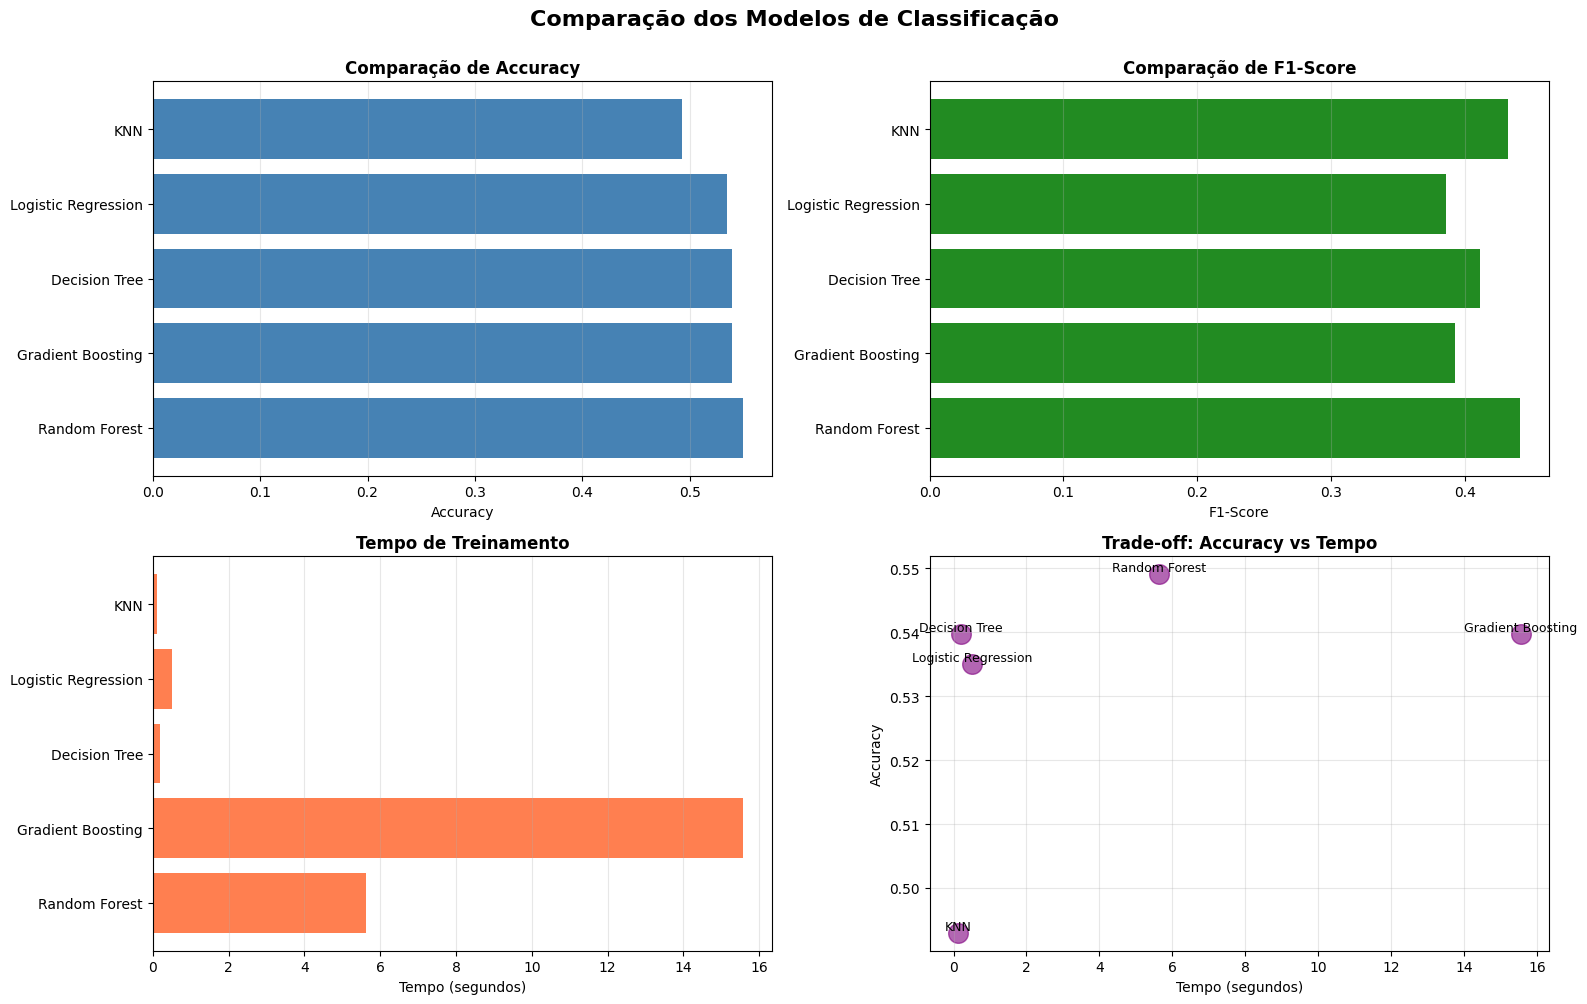

In [46]:
# Visualizações comparativas
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Accuracy
axes[0, 0].barh(comparacao['Modelo'], comparacao['Accuracy'], color='steelblue')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Comparação de Accuracy', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 2: F1-Score
axes[0, 1].barh(comparacao['Modelo'], comparacao['F1-Score'], color='forestgreen')
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('Comparação de F1-Score', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Gráfico 3: Tempo de execução
axes[1, 0].barh(comparacao['Modelo'], comparacao['Tempo (s)'], color='coral')
axes[1, 0].set_xlabel('Tempo (segundos)')
axes[1, 0].set_title('Tempo de Treinamento', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 4: Accuracy vs Tempo
axes[1, 1].scatter(comparacao['Tempo (s)'], comparacao['Accuracy'], s=200, alpha=0.6, color='purple')
for idx, row in comparacao.iterrows():
    axes[1, 1].annotate(row['Modelo'], (row['Tempo (s)'], row['Accuracy']), 
                        fontsize=9, ha='center', va='bottom')
axes[1, 1].set_xlabel('Tempo (segundos)')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Trade-off: Accuracy vs Tempo', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Comparação dos Modelos de Classificação', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

/var/folders/77/sv0r0hys7jg3ht7_khjzpp8r0000gn/T/ipykernel_40581/6728910.py:25: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



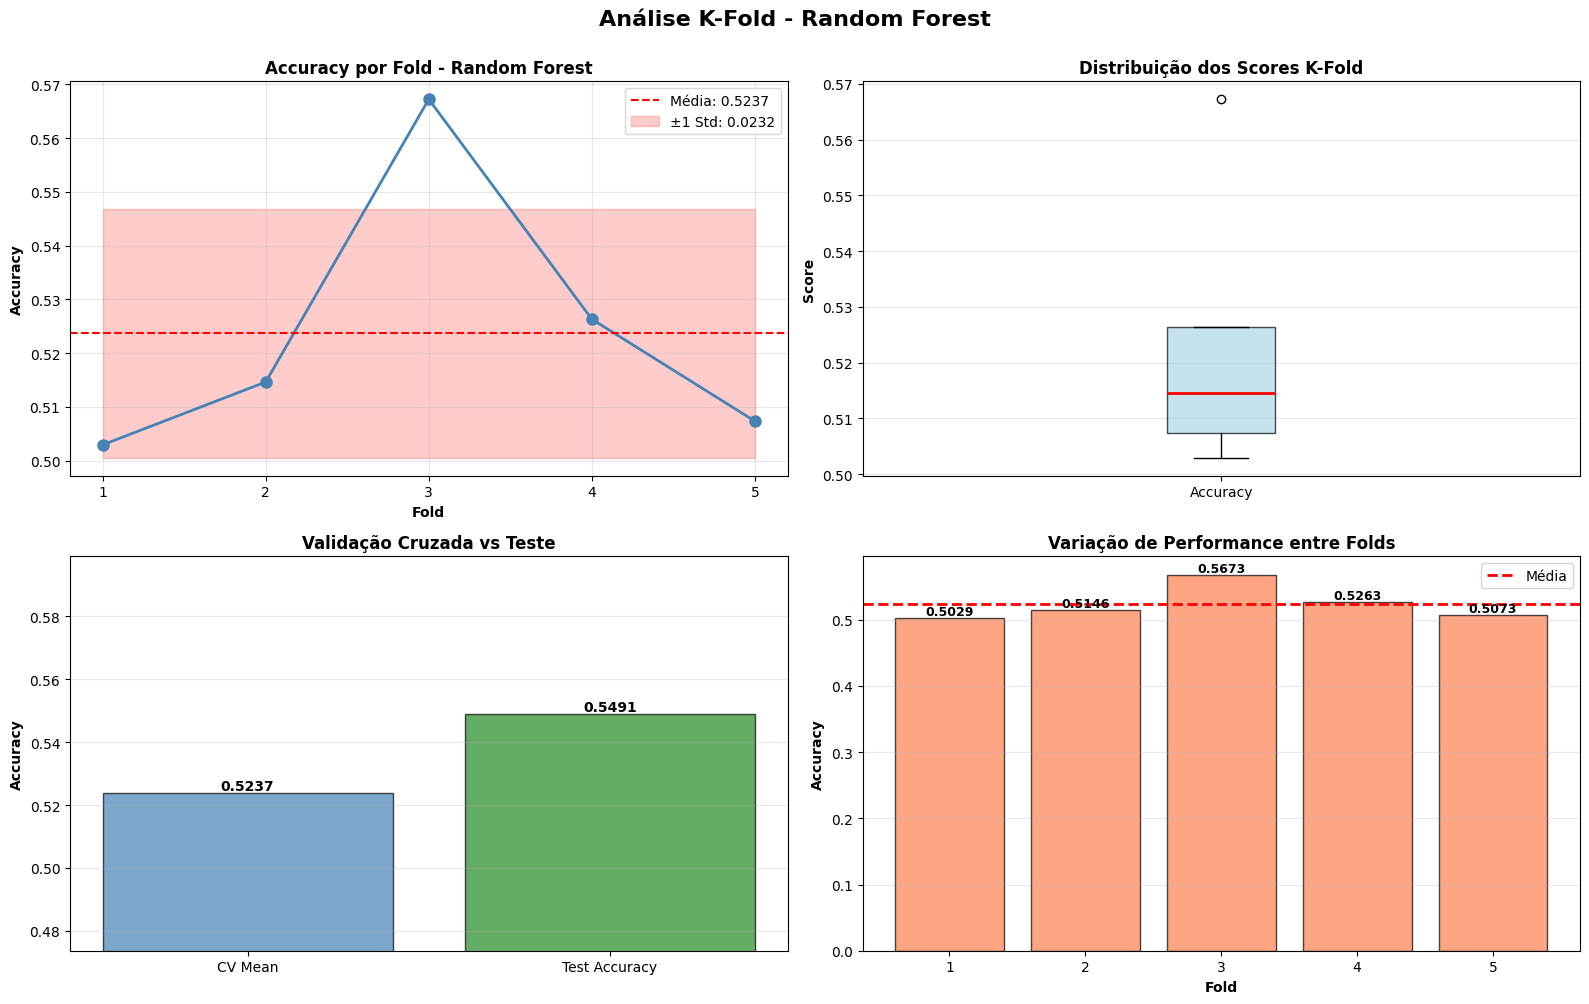


ESTATÍSTICAS K-FOLD - Random Forest

Scores por fold:
  Fold 1: 0.5029
  Fold 2: 0.5146
  Fold 3: 0.5673
  Fold 4: 0.5263
  Fold 5: 0.5073

Média: 0.5237
Desvio Padrão: 0.0232
Mínimo: 0.5029
Máximo: 0.5673
Range: 0.0643

Accuracy no teste: 0.5491
F1-Score no teste: 0.4410


In [47]:
# Visualizar métricas K-Fold do melhor modelo
melhor_modelo_nome = comparacao.iloc[0]['Modelo']
melhor_resultado = resultados[melhor_modelo_nome]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Accuracy por Fold
fold_numbers = list(range(1, 6))
fold_scores = melhor_resultado['fold_scores']

axes[0, 0].plot(fold_numbers, fold_scores, marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0, 0].axhline(y=melhor_resultado['cv_mean'], color='red', linestyle='--', label=f'Média: {melhor_resultado["cv_mean"]:.4f}')
axes[0, 0].fill_between(fold_numbers, 
                        melhor_resultado['cv_mean'] - melhor_resultado['cv_std'],
                        melhor_resultado['cv_mean'] + melhor_resultado['cv_std'],
                        alpha=0.2, color='red', label=f'±1 Std: {melhor_resultado["cv_std"]:.4f}')
axes[0, 0].set_xlabel('Fold', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy', fontweight='bold')
axes[0, 0].set_title(f'Accuracy por Fold - {melhor_modelo_nome}', fontweight='bold', fontsize=12)
axes[0, 0].set_xticks(fold_numbers)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Distribuição das métricas por fold
axes[0, 1].boxplot([fold_scores], labels=['Accuracy'], patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('Score', fontweight='bold')
axes[0, 1].set_title('Distribuição dos Scores K-Fold', fontweight='bold', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Gráfico 3: Comparação CV vs Teste
metrics_names = ['CV Mean', 'Test Accuracy']
metrics_values = [melhor_resultado['cv_mean'], melhor_resultado['accuracy']]
colors = ['steelblue', 'forestgreen']

bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7, edgecolor='black')
axes[1, 0].set_ylabel('Accuracy', fontweight='bold')
axes[1, 0].set_title('Validação Cruzada vs Teste', fontweight='bold', fontsize=12)
axes[1, 0].set_ylim([min(metrics_values) - 0.05, max(metrics_values) + 0.05])

# Adicionar valores nas barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.4f}',
                    ha='center', va='bottom', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Gráfico 4: Variação entre folds
axes[1, 1].bar(fold_numbers, fold_scores, color='coral', alpha=0.7, edgecolor='black')
axes[1, 1].axhline(y=melhor_resultado['cv_mean'], color='red', linestyle='--', linewidth=2, label='Média')
axes[1, 1].set_xlabel('Fold', fontweight='bold')
axes[1, 1].set_ylabel('Accuracy', fontweight='bold')
axes[1, 1].set_title('Variação de Performance entre Folds', fontweight='bold', fontsize=12)
axes[1, 1].set_xticks(fold_numbers)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, (fold, score) in enumerate(zip(fold_numbers, fold_scores)):
    axes[1, 1].text(fold, score, f'{score:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle(f'Análise K-Fold - {melhor_modelo_nome}', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Imprimir estatísticas detalhadas
print("\n" + "=" * 70)
print(f"ESTATÍSTICAS K-FOLD - {melhor_modelo_nome}")
print("=" * 70)
print(f"\nScores por fold:")
for i, score in enumerate(fold_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"\nMédia: {melhor_resultado['cv_mean']:.4f}")
print(f"Desvio Padrão: {melhor_resultado['cv_std']:.4f}")
print(f"Mínimo: {min(fold_scores):.4f}")
print(f"Máximo: {max(fold_scores):.4f}")
print(f"Range: {max(fold_scores) - min(fold_scores):.4f}")
print(f"\nAccuracy no teste: {melhor_resultado['accuracy']:.4f}")
print(f"F1-Score no teste: {melhor_resultado['f1_score']:.4f}")
print("=" * 70)

RELATÓRIO DETALHADO - Random Forest

Classification Report:
                     precision    recall  f1-score   support

     Ataque a civis       0.00      0.00      0.00        18
              Briga       0.00      0.00      0.00        43
Homicidio/Tentativa       0.55      0.94      0.70       232
    Tentativa/Roubo       0.50      0.13      0.20       135

           accuracy                           0.55       428
          macro avg       0.26      0.27      0.22       428
       weighted avg       0.46      0.55      0.44       428



/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/evaldocunhafilho/Documents/Data_Science/Crime-detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



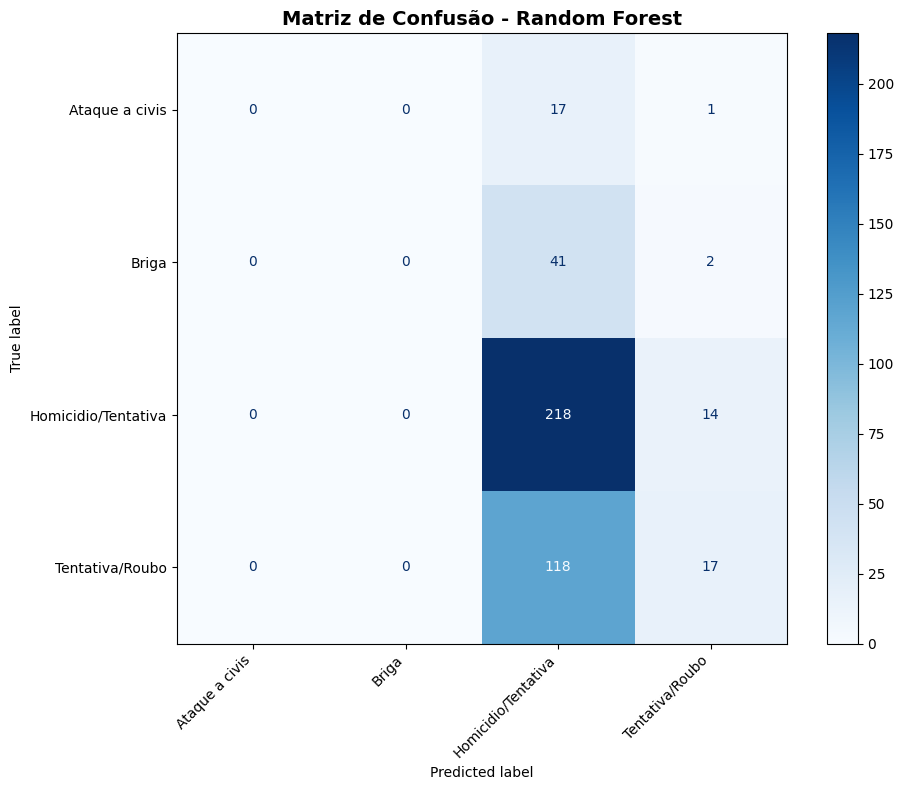


Análise completa!


In [192]:
# Relatório detalhado do melhor modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

melhor_modelo_nome = comparacao.iloc[0]['Modelo']
melhor_resultado = resultados[melhor_modelo_nome]

print("=" * 70)
print(f"RELATÓRIO DETALHADO - {melhor_modelo_nome}")
print("=" * 70)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, melhor_resultado['y_pred'], 
                          target_names=le_crime.classes_))

# Matriz de Confusão
fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(y_test, melhor_resultado['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_crime.classes_)
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title(f'Matriz de Confusão - {melhor_modelo_nome}', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("Análise completa!")
print("=" * 70)